Author: **SRISAICHARAN VELISETTI**



# Template Matching  

## Overview
The goal of this part is to build a template maching algorithm for where's waldo puzzle. 
The end product should be finding waldo in puzzle images. 


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**


In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
!unzip "/content/Part4_data.zip" -d "/content/"

## Code

We provide the following functions for plotting your results 


In [132]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(im,title,xticks=[],yticks= [],cv2 = True):
    plt.figure()
    plt.imshow(im[:,:,::-1])
    plt.title(title)
    plt.xticks(xticks)
    plt.yticks(yticks)

In [133]:
map = cv2.imread("/content/Part4_data/puzzle2/map.jpg")
waldo = cv2.imread("/content/Part4_data/puzzle2/waldo.png")
# plot_image(map,'Puzzle')
# plot_image(waldo,'Waldo')

### Subpart 1: Template Matching with OpenCV
OpenCV provide Template Matching functions below link. 

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

You can use this function for implementing simple where's waldo algorithm.

This part helps you to understand the concepts of Template Matching and OpenCV Library. This is just for reference.

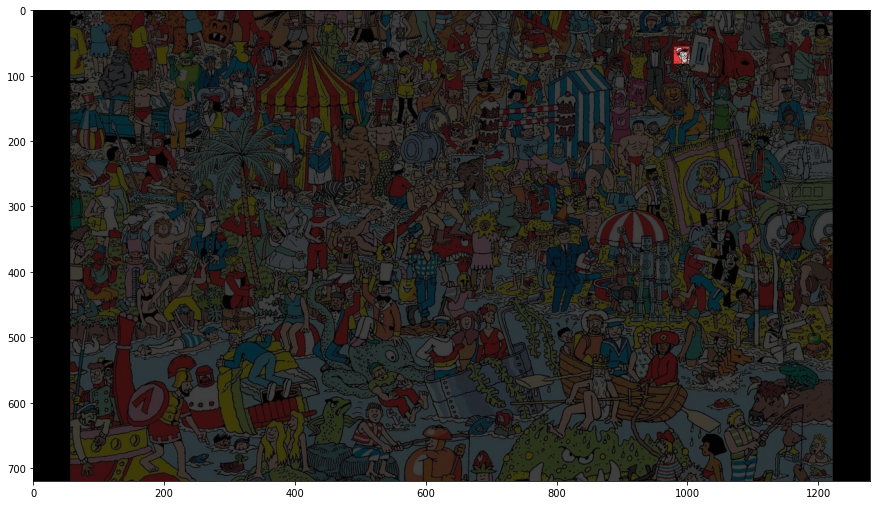

In [134]:
(waldo_height, waldo_width) = waldo.shape[:2]
result = cv2.matchTemplate(map, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)
top_left = maxLoc
bottom_right = (top_left[0] + waldo_width, top_left[1] + waldo_height)
region_of_interest = map[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]]
mask = np.zeros(map.shape, dtype = "uint8")
map = cv2.addWeighted(map, 0.25, mask, 0.75, 0)
map[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]] = region_of_interest
final_result = cv2.cvtColor(map, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.imshow(final_result)

### Subpart 2: Template Matching from Scratch

Implement the Sum of Squared Distance (SSD) template matching algorithm from scratch (Don't use cv2.matchTemplate).

Then, show the results of where's waldo for two puzzle images.

Hints: You can borrow the codes from Part1 and Part2. Please read methods for matching with filters in Lecture Slide.  

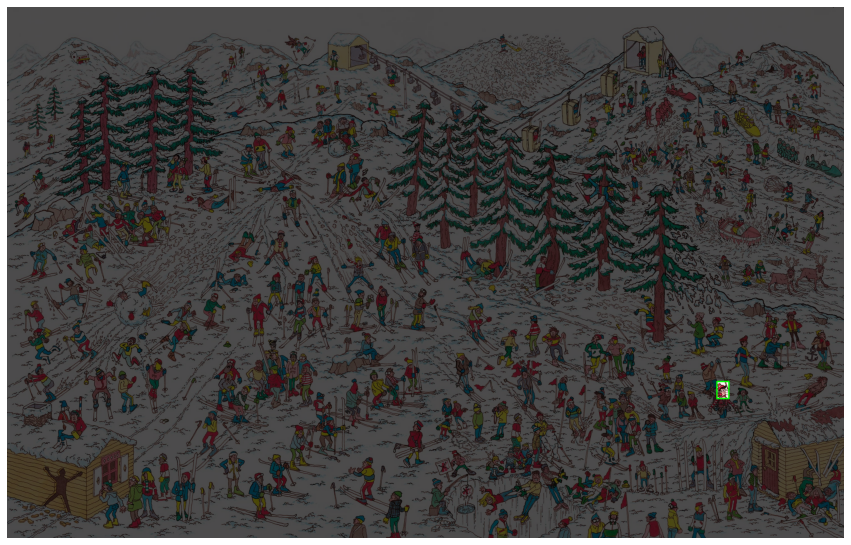

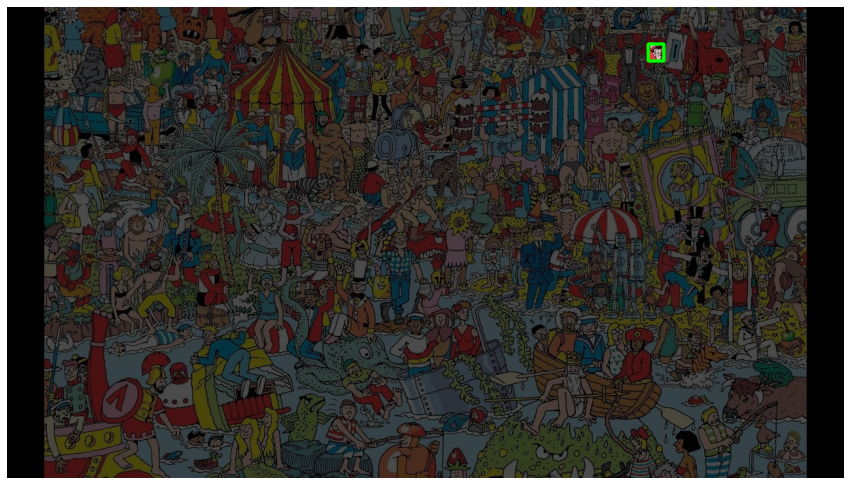

In [135]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow ## Use this to show image in colab
import matplotlib.pyplot as plt

def sum_of_squared_differences(image, template):
    I, T = image.astype('float'),template.astype('float')
    H, W = I.shape[0], I.shape[1]
    h, w = T.shape[0], T.shape[1]
    R = np.ones_like(image)*np.inf
    
    for i in range(W-w):
        for j in range(H-h):
            t = (I[j: j+h, i: i+w] - T).ravel()
            R[j, i] = t.dot(t)

    return R

def template_matching(image, template):
    R = sum_of_squared_differences(image, template)
    _, _, min_loc, max_loc = cv2.minMaxLoc(-R)
    top_left = max_loc
    h,w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    return R, top_left,bottom_right

def plot_image(map_puzzle,top_left,bottom_right):
  region_of_interest = map_puzzle[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]]
  mask = np.zeros(map_puzzle.shape, dtype = "uint8")
  image_map = cv2.addWeighted(map_puzzle, 0.3, mask, 0.7, 0)
  image_map[top_left[1] : bottom_right[1], top_left[0] : bottom_right[0]] = region_of_interest
  final_result = cv2.cvtColor(image_map, cv2.COLOR_RGB2BGR)
  cv2.rectangle(final_result, top_left, bottom_right, (0,255,0),4)
  return final_result

##P-1:
map_puzzle1 = cv2.imread('/content/Part4_data/puzzle1/pic1.jpeg')
gray_map1 = cv2.cvtColor(map_puzzle1.copy(), cv2.COLOR_BGR2GRAY)
waldo_temp_1 = cv2.imread('/content/Part4_data/puzzle1/waldo.jpg')
gray_waldo_p1 = cv2.cvtColor(waldo_temp_1.copy(), cv2.COLOR_BGR2GRAY)
R,  top_left,bottom_right = template_matching(gray_map1,gray_waldo_p1)
result = plot_image(map_puzzle1,top_left,bottom_right)
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(result)

##P-2:
map_puzzle2 = cv2.imread('/content/Part4_data/puzzle2/map.jpg')
gray_map2 = cv2.cvtColor(map_puzzle2.copy(), cv2.COLOR_BGR2GRAY)
waldo_temp_2 = cv2.imread('/content/Part4_data/puzzle2/waldo.png')
gray_waldo_p2 = cv2.cvtColor(waldo_temp_2.copy(), cv2.COLOR_BGR2GRAY)
R,  top_left,bottom_right = template_matching(gray_map2,gray_waldo_p2)
result_2 = plot_image(map_puzzle2,top_left,bottom_right)
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(result_2)